# Lab 2: Probability, Distributions, and Statistical Questions
## Problem 1

[0.00113 0.00567 0.01655 0.03547 0.06108 0.08867 0.11172 0.12462 0.12487
 0.11363 0.09418 0.07127 0.04909 0.03061 0.01714 0.00852 0.00368 0.00132
 0.00033]
[0.00008 0.00057 0.00239 0.00717 0.01713 0.03435 0.05977 0.09217 0.12798
 0.16189 0.18821 0.20246 0.20252 0.18905 0.16506 0.13496 0.10339 0.07417
 0.04974 0.03111 0.01806 0.00967 0.00473 0.00209 0.00082 0.00027 0.00007
 0.00001]
[0.00001 0.00008 0.00042 0.00161 0.00489 0.01241 0.02724 0.05292 0.09251
 0.14735 0.21593 0.29333 0.37161 0.44123 0.49292 0.51977 0.51861 0.49057
 0.44056 0.37598 0.30509 0.23542 0.17269 0.12033 0.07955 0.0498  0.02945
 0.0164  0.00856 0.00416 0.00187 0.00077 0.00028 0.00009 0.00002 0.00001
 0.     ]
[0.      0.00001 0.00009 0.00041 0.0015  0.00458 0.01207 0.02812 0.05887
 0.11222 0.19673 0.31974 0.48489 0.68982 0.92467 1.17222 1.40978 1.61269
 1.75854 1.83123 1.82379 1.73929 1.58981 1.39379 1.17257 0.94685 0.73389
 0.5459  0.38953 0.26645 0.17455 0.10937 0.06544 0.03731 0.02022 0.01038
 0.00503 0.00228 0.00

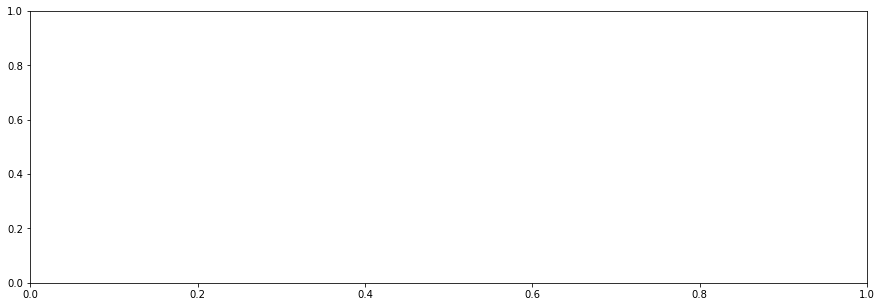

In [95]:
from scipy import stats, signal
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

fig1, ax1 = plt.subplots(1,1, figsize=(15,5))

x = 5  # 1-day average cosmic-ray background
y = 6 # average number of gamma-rays emitted by hypothetical source

#---- Part A
# Background noise is Poisson; how does Poisson change as integrate multiple days

xlin = np.arange(stats.poisson.ppf(0.01, x),
              stats.poisson.ppf(0.99, x))
plots = []
out = stats.poisson.pmf(xlin, x)
for n in range(1,6):
    out = signal.fftconvolve(out, n*poi)
    plots.append(out)
    print(out)
np.set_printoptions(precision=5, suppress=True)
# ax1.plot(xlin, stats.poisson.pmf(xlin, x));

#---- Part B
# sum of pdfs still look like Poisson



Here we can see that after 5 days, the convolved Poisson distribution still maintains the structure of a Poisson distribution. Mathematically, the number of days is the trial and is only affecting the magnitude/spread of the distribution. The averages and variance are still the same but only scaled by a factor of days.

In [97]:
#---- Part C

days = []
# print(stats.poisson.pmf(xlin, x)) # 1 day
for i in range(1,6):
    in1 = stats.poisson.pmf(xlin, x)
    for j in range(1,i):
        # print("Days: ", j+1)
        in1 = signal.fftconvolve(in1, stats.poisson.pmf(xlin,x))
        #  print(signal.fftconvolve(in1, stats.poisson.pmf(xlin,x)))
    days.append(in1)
print(days)

#---- Part D

n = 5  # number of days
P = 1-stats.poisson.cdf(n*y, x)
print("Probability: ", P)
sig = stats.norm.ppf(P)
print("", sig)

[array([0.03369, 0.08422, 0.14037, 0.17547, 0.17547, 0.14622, 0.10444,
       0.06528, 0.03627, 0.01813]), array([0.00113, 0.00567, 0.01655, 0.03547, 0.06108, 0.08867, 0.11172,
       0.12462, 0.12487, 0.11363, 0.09418, 0.07127, 0.04909, 0.03061,
       0.01714, 0.00852, 0.00368, 0.00132, 0.00033]), array([0.00004, 0.00029, 0.00119, 0.00358, 0.00856, 0.01718, 0.02988,
       0.04608, 0.06399, 0.08094, 0.09411, 0.10123, 0.10126, 0.09452,
       0.08253, 0.06748, 0.05169, 0.03708, 0.02487, 0.01555, 0.00903,
       0.00484, 0.00237, 0.00105, 0.00041, 0.00014, 0.00004, 0.00001]), array([0.     , 0.00001, 0.00007, 0.00027, 0.00082, 0.00207, 0.00454,
       0.00882, 0.01542, 0.02456, 0.03599, 0.04889, 0.06194, 0.07354,
       0.08215, 0.08663, 0.08643, 0.08176, 0.07343, 0.06266, 0.05085,
       0.03924, 0.02878, 0.02006, 0.01326, 0.0083 , 0.00491, 0.00273,
       0.00143, 0.00069, 0.00031, 0.00013, 0.00005, 0.00002, 0.     ,
       0.     , 0.     ]), array([0.     , 0.     , 0.     , 0.0000

The central limit theorem...

The sigma of the 

## Problem 2

[0.14036 0.16852 0.19625 0.22349 0.25016 0.27621 0.30156 0.32618 0.34999
 0.37294 0.395   0.4161  0.43622 0.45531 0.47334 0.49028 0.5061  0.52079
 0.53432 0.5467  0.55789 0.56791 0.57675 0.58442 0.59092 0.59627 0.60048
 0.60356 0.60555 0.60646 0.60633 0.60517 0.60304 0.59996 0.59597 0.5911
 0.58541 0.57893 0.57171 0.56379 0.55521 0.54603 0.53628 0.52602 0.51529
 0.50414 0.49261 0.48075 0.46859 0.45619 0.44359 0.43082 0.41793 0.40496
 0.39193 0.37889 0.36587 0.3529  0.34001 0.32723 0.31458 0.30209 0.28979
 0.27768 0.2658  0.25415 0.24276 0.23163 0.22078 0.21022 0.19996 0.19001
 0.18036 0.17103 0.16201 0.15332 0.14494 0.13689 0.12915 0.12173 0.11462
 0.10782 0.10132 0.09512 0.08921 0.08359 0.07824 0.07317 0.06835 0.0638
 0.05948 0.05541 0.05157 0.04794 0.04453 0.04132 0.03831 0.03548 0.03283
 0.03035]


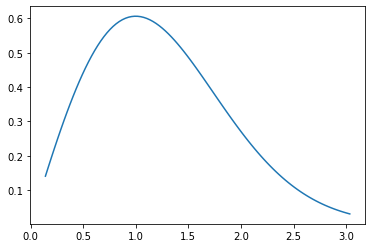

In [122]:
#---- Part A
# averaging/summing == convolution

xlin = np.linspace(stats.rayleigh.ppf(0.01),
                stats.rayleigh.ppf(0.99), 100)
pdf = stats.rayleigh.pdf(xlin)
print(pdf)



#---- Part B

fig2, ax2 = plt.subplots(1,1)

for n in range(1, 2):
    ax2.plot(xlin, n*pdf)

The shape begins to approach a Gaussian distribution after 10 trials


&nbsp;
## Problem 3

## Problem 4